In [39]:
import numpy
import math
from astropy.io import fits
from astropy.table import Table
from matplotlib.colors import LogNorm
from astropy.modeling import models, fitting

#set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
HI_Pipe3D_WISE = fits.open("HI_Pipe3D_WISE.fits", memmap=True)
HI_Pipe3D_WISE_table = Table(HI_Pipe3D_WISE[1].data)
print(HI_Pipe3D_WISE_table [1].columns)

<TableColumns names=('ra_01','dec_01','radius_01','ra','dec','W1mag','W1magerr','W2mag','W2magerr','W3mag','W3magerr','W4mag','W4magerr','cc_flags','ext_flg','ph_qual','moon_lev','MaNGAID_1','objra_1','objdec_1','redshift','re_arc','PA','ellip','DL','re_kpc','log_Mass','e_log_Mass','log_SFR_Ha','e_log_SFR_Ha','log_SFR_ssp','e_log_SFR_ssp','log_Mass_gas','e_log_Mass_gas','Age_LW_Re_fit','e_Age_LW_Re_fit','alpha_Age_LW_Re_fit','e_alpha_Age_LW_Re_fit','age_MW_Re_fit','e_age_MW_Re_fit','alpha_Age_MW_Re_fit','e_alpha_Age_MW_Re_fit','ZH_LW_Re_fit','e_ZH_LW_Re_fit','alpha_ZH_LW_Re_fit','e_alpha_ZH_LW_Re_fit','ZH_MW_Re_fit','e_ZH_MW_Re_fit','alpha_ZH_MW_Re_fit','e_alpha_ZH_MW_Re_fit','Av_ssp_Re','e_Av_ssp_Re','Av_gas_Re','e_Av_gas_Re','OH_Re_fit_O3N2','e_OH_Re_fit_O3N2','alpha_OH_Re_fit_O3N2','e_alpha_OH_Re_fit_O3N2','OH_Re_fit_N2','e_OH_Re_fit_N2','alpha_OH_Re_fit_N2','e_alpha_OH_Re_fit_N2','OH_Re_fit_ONS','e_OH_Re_fit_ONS','alpha_OH_Re_fit_ONS','e_alpha_OH_Re_fit_ONS','OH_Re_fit_pyqz','e_OH_

In [56]:
MHI_log_initial = numpy.array(HI_Pipe3D_WISE_table['LOGMHI'])  # Stores all data of MHI log(Msun)
SM_log_initial = numpy.array(HI_Pipe3D_WISE_table['log_Mass'])    #SM = Stellar Mass    log(Msun)
W2_initial = numpy.array(HI_Pipe3D_WISE_table['W2mag'])  # Stores all data of W2
W3_initial = numpy.array(HI_Pipe3D_WISE_table['W3mag'])  # Stores all data of W3
Flagall = numpy.array(HI_Pipe3D_WISE_table['conflag'])   # All Flag data 
Plateifu_initial = numpy.array(HI_Pipe3D_WISE_table['plateifu_1'])
MHI_limit_initial = numpy.array(HI_Pipe3D_WISE_table['LOGHILIM200KMS'])     # upper limits for non-detections

detections = numpy.where((MHI_log_initial > 0))
non_detections = numpy.where((MHI_limit_initial > 0))

W2diffW3 = W2_initial - W3_initial


# Data for detections
MHI_log = MHI_log_initial[detections]                  # HI Mass log(Msun)
SM_log_detect = SM_log_initial[detections]                    # Steller Mass log(Msun)
W2diffW3_detect = W2diffW3[detections]
# Plateifu_detect = Plateifu_initial[detections]

MF_log_detect = MHI_log - SM_log_detect                     # Mass Fraction     log(Msun) 

# print(len(W2diffW3_detect), len(MF_log_detect))           



# Data for non-detections
MHI_limit = MHI_limit_initial[non_detections]                  # HI Mass limit log(Msun)
SM_log_Ndetect = SM_log_initial[non_detections]                    # Steller Mass log(Msun)
W2diffW3_Ndetect = W2diffW3[non_detections]
# Plateifu_Ndetect = Plateifu_initial[non_detections]

MF_log_Ndetect = MHI_limit - SM_log_Ndetect                     # Mass Fraction     log(Msun) 


# print(len(W2diffW3_Ndetect), len(MF_log_Ndetect))
# print(len(MF_log_Ndetect) + len(W2diffW3_detect))
# check = [x for x in Plateifu_initial if x not in Plateifu_detect and x not in Plateifu_Ndetect]
# print(check)

print(len(MHI_log), len(MHI_limit))
print(len(MHI_limit[numpy.where(W2diffW3_Ndetect < 2.0)]))
print(len(MHI_log[numpy.where(W2diffW3_detect < 2.0)]))


636 747
253
26


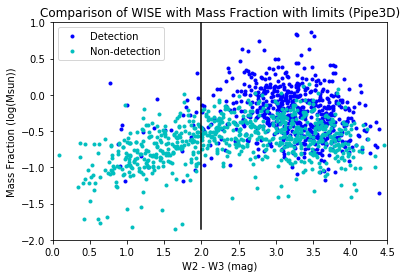

In [53]:
plt.xlabel("W2 - W3 (mag)")
plt.ylabel("Mass Fraction (log(Msun))")
plt.title("Comparison of WISE with Mass Fraction with limits (Pipe3D)")

plt.plot(W2diffW3_detect, MF_log_detect, "b.", label='Detection')
plt.plot(W2diffW3_Ndetect, MF_log_Ndetect, "c.", label='Non-detection')
plt.plot([2, 2], [numpy.min(MF_log_Ndetect), numpy.max(MF_log_detect)], "k-")

plt.xlim(0, 4.5)
plt.ylim(-2, 1)
plt.legend()
plt.show()